Был загружен датасет с помощью библиотеки pandas.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/content/credit_risk2.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              652 non-null    int64  
 1   Age             652 non-null    float64
 2   Income          652 non-null    int64  
 3   Home            652 non-null    object 
 4   Emp_length      643 non-null    float64
 5   Intent          652 non-null    object 
 6   Amount          652 non-null    int64  
 7   Rate            586 non-null    float64
 8   Status          652 non-null    int64  
 9   Percent_income  652 non-null    float64
 10  Default         652 non-null    object 
 11  Cred_length     652 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 61.2+ KB


Обзор каждого столбца датасета:

> Возраст (Age) - содержит информацию о возрасте людей, подавших заявку на кредит.

> Доход(Income) - содержит информацию о ежемесячном доходе.

> Статус домовладения (Home) (Собственный, Ипотека, Аренда) - столбец содержит информацию о статусе домовладения заявителя.

> Стаж работы в годах(Emp_length) - столбец содержит информацию о стаже работы в годах.

> Сумма кредита по заявке(Amount) - столбец содержит информацию о запрашиваемой сумме кредита.

> Цель кредита(Intent) - столбец содержит информацию о цели получения кредита.

> Сумма кредита в процентах от дохода(Percent_income) - столбец показывает соотношение суммы кредита к доходу заявителя в процентах.

> Статус одобрения кредита(Status) - столбец содержит информацию о статусе одобрения кредита(1, 0).

> Не допустил ли заявитель ранее дефолта по кредиту (да, нет) (Default) - столбец указывает допускал ли заявитель ранее дефолт по кредиту.

> Длина кредитной истории заявителя (Credit_length) - столбец содержит информацию о длине кредитной истории заявителя (в годах).

> Процентная ставка(Rate) - столбец содержит информацию о процентной ставке кредита.

По данным, выведеным методом выше, можно сделать вывод, что в столбцах Emp-lenght и Rate имеются пропуски, столбец Age имеет тип данных float64, хотя должен иметь тип данных int64.

По данным, выведеным методом выше, можно сделать вывод, что в столбцах Emp-lenght и Rate имеются пропуски, столбец Age имеет тип данных float64, хотя должен иметь тип данных int64.
С помощью метода filna пропуски в столбце процентная ставка были заменены на 10 - среднее значение процентной ставки в банке, стаж работы в годах - на 0, что может повлиять на вероятность выдачи кредита, но, данное значение подходит, в случае, если заявитель не заполнил данную строку.

In [ ]:
df['Emp_length'] = df['Emp_length'].fillna(0)
df['Rate'] = df['Rate'].fillna(10)
df.isna().sum()

Id                0
Age               0
Income            0
Home              0
Emp_length        0
Intent            0
Amount            0
Rate              0
Status            0
Percent_income    0
Default           0
Cred_length       0
dtype: int64

С помощью метода duplicated была получена информация о количестве дубликатов (строк, которые полностью повторяют уже встречавшиеся в датасете строки).

In [ ]:
df.duplicated().sum()

2

Также были найдены продублированные строки.

In [ ]:
df[df.duplicated()]

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
650,649,23.0,58800,RENT,7.0,DEBTCONSOLIDATION,20000,7.66,1,0.34,N,3
651,649,23.0,58800,RENT,7.0,DEBTCONSOLIDATION,20000,7.66,1,0.34,N,3


С помощью метода drop_duplicates эти дубликаты были удалены.

In [ ]:
df = df.drop_duplicates().reset_index(drop=True)

Была проведена проверка с помощью вызова функции duplicated ещё раз

In [ ]:
df.duplicated().sum()

0

С помощью метода unique были найдены неявные дубликаты в столбце «Статус домовладения» и исправлены неправильные и альтернативные значения.

In [ ]:
df['Home'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'RENET', 'OTHER'], dtype=object)

In [ ]:
df['Home'] = df['Home'].replace('RENET','RENT')
df['Home'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

Также были проверен столбец "Цель кредита"

In [ ]:
print(df['Intent'].unique())

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


Также был проверен столбец «Не допустил ли заявитель ранее дефолта по кредиту (да, нет)»

In [ ]:
df['Default'].unique()

array(['Y', 'N', 'No'], dtype=object)

В нём был выявлен и исправлен дубликат.

In [ ]:
df['Default'] = df['Default'].replace('No','N')
df['Default'].unique()

array(['Y', 'N'], dtype=object)

В столбце Age подходящий тип данных - int64, у нас же - float64. Необходимо изменить тип данных в столбце Age. Для этого вызовем метод astype.

In [ ]:
df['Age'] = df['Age'].astype(int)

После вызова метода необходимо проверить, изменился ли тип данных в изначальном датафрейме.

In [ ]:
df.dtypes

Id                  int64
Age                 int64
Income              int64
Home               object
Emp_length        float64
Intent             object
Amount              int64
Rate              float64
Status              int64
Percent_income    float64
Default            object
Cred_length         int64
dtype: object

Была построена точечная диаграмма (матрицу диаграмм рассеяния). Для построения диаграммы были выбраны столбцы 'Age', 'Income','Emp_length','Amount','Rate','Percent_income','Cred_length','Home', в параметре hue была выбрана категория ‘Home’. Диаграммы показывают зависимость между определенными переменными, отображая также зависимость от типа домовладения.

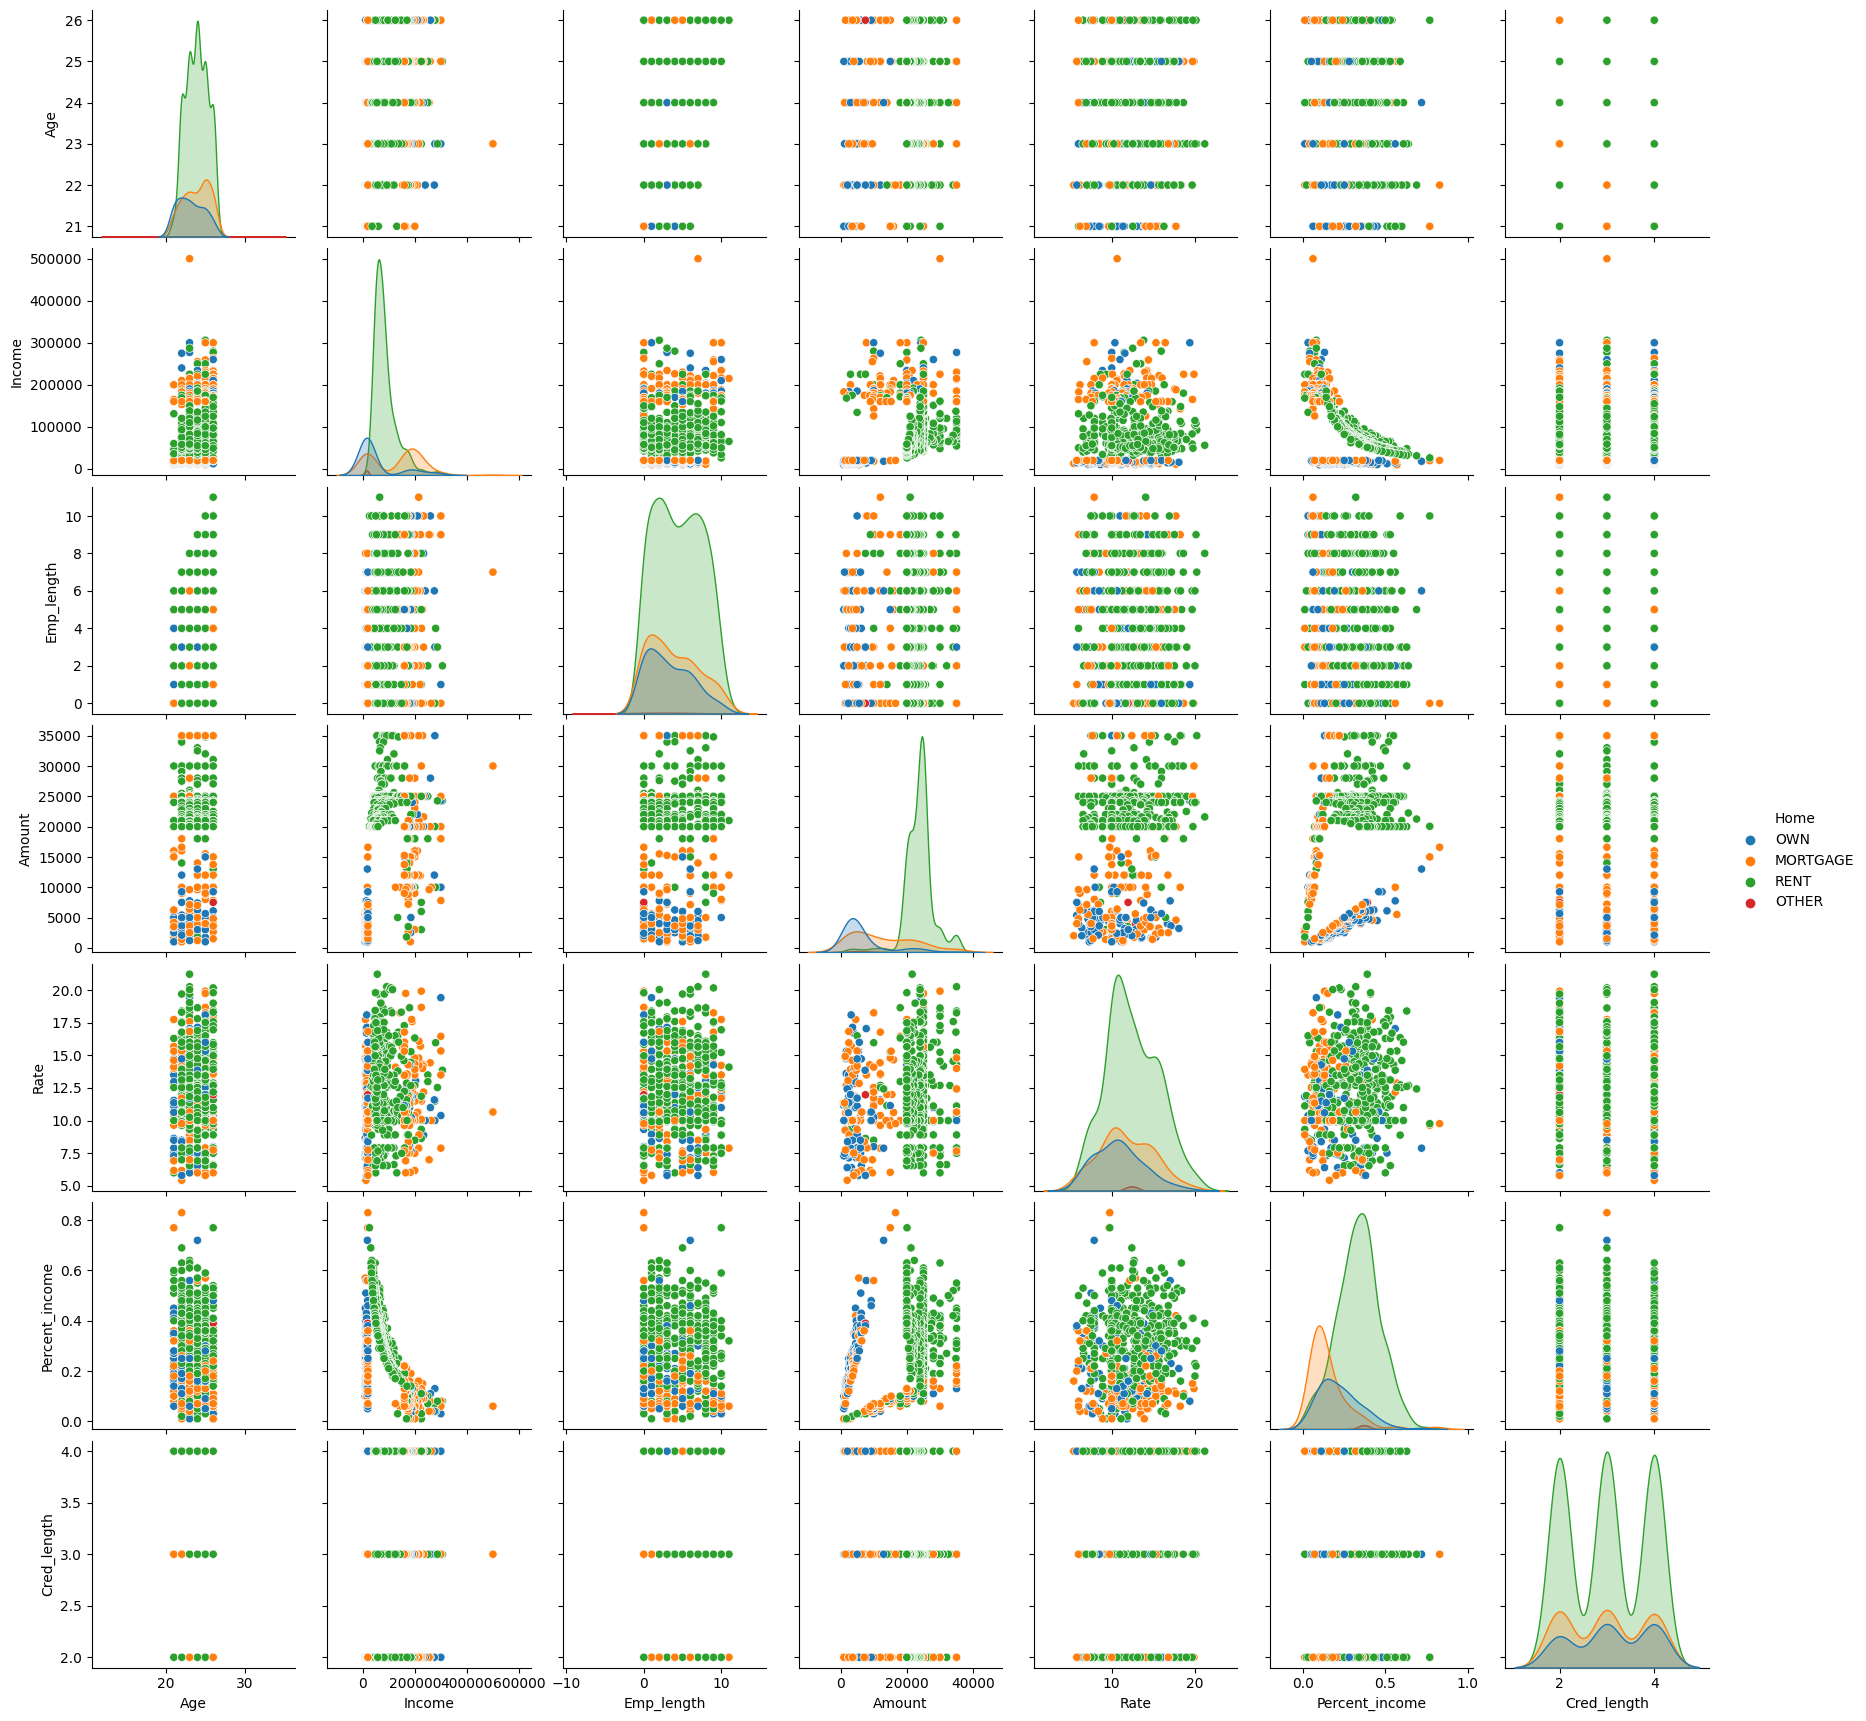

In [ ]:
import seaborn as sns
df = df[(df.Age < 120) &( df.Emp_length < 120)]
sns.pairplot(df[['Age', 'Income','Emp_length','Amount','Rate','Percent_income','Cred_length','Home']], hue = 'Home')


Из данной диаграммы были сделаны следующие выводы:
*   Среди заявителей с высоким заработком меньше тех, кто арендует жилье
*   Многие заявители после 22 лет арендуют жилье
*   Чем выше зарплата, тем ниже процент платежа по кредиту от зп
*   Большинство заявителей арендуют жилье
*   Тип домовладения у заявителей с высокой суммой кредита в большинстве своём аренда

С помощью метода corr была выведены коэффициенты корреляции. Корреляция показывает зависимость между двумя значениями.

In [ ]:
df[['Age','Income','Emp_length','Amount','Rate','Status','Percent_income','Cred_length']].corr()


,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
Age,1.000000,0.317043,0.189256,0.196306,0.033051,-0.165950,-0.152110,0.002327
Income,0.317043,1.000000,0.183024,0.304547,0.059274,-0.584130,-0.618168,0.000761
Emp_length,0.189256,0.183024,1.000000,0.180482,-0.014456,-0.058684,-0.055561,-0.083863
Amount,0.196306,0.304547,0.180482,1.000000,0.205411,0.074134,0.334844,-0.024386
Rate,0.033051,0.059274,-0.014456,0.205411,1.000000,0.165030,0.059709,-0.041875
Status,-0.165950,-0.584130,-0.058684,0.074134,0.165030,1.000000,0.671726,-0.038404
Percent_income,-0.152110,-0.618168,-0.055561,0.334844,0.059709,0.671726,1.000000,-0.033277
Cred_length,0.002327,0.000761,-0.083863,-0.024386,-0.041875,-0.038404,-0.033277,1.000000


После анализа данных коэффициентов можно сделать вывод, что линейная взаимосвязь между переменными отсутствует. Нулевой корреляции так же нет. Между возрастом и суммой кредита в процентах от дохода отрицательная корреляция, что означает то, что при увеличении одного показателя, другой уменьшается. Между доходом и возрастом положительная корреляция, что означает то, что при увеличении одного показателя, увеличивается и другой. Можно сказать, что чем выше доход, тем ниже сумма кредита в процентах от дохода, также есть взаимосвязь между возрастом и доходом.

С помощью метода cov() были выведены коэффициенты ковариации, ковариация также покаывает зависимость двух величин, однако, в отличие от коэффициента корреляции, показатель зависит от единицы измерения и масштаба случайных величин.

In [ ]:
df[['Age','Income','Emp_length','Amount','Rate','Status','Percent_income','Cred_length']].cov()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length
Age,2.218869,3.274487e+04,0.864399,2.675380e+03,0.156244,-0.121036,-0.033912,0.002812
Income,32744.867543,4.807481e+09,38910.328001,1.931963e+08,13043.080289,-19830.799726,-6414.967907,42.818179
Emp_length,0.864399,3.891033e+04,9.401521,5.063125e+03,-0.140673,-0.088102,-0.025498,-0.208621
Amount,2675.379592,1.931963e+08,5063.125150,8.370907e+07,5964.372843,332.105963,458.519117,-181.017141
Rate,0.156244,1.304308e+04,-0.140673,5.964373e+03,10.071875,0.256442,0.028361,-0.107820
Status,-0.121036,-1.983080e+04,-0.088102,3.321060e+02,0.256442,0.239742,0.049226,-0.015256
Percent_income,-0.033912,-6.414968e+03,-0.025498,4.585191e+02,0.028361,0.049226,0.022401,-0.004041
Cred_length,0.002812,4.281818e+01,-0.208621,-1.810171e+02,-0.107820,-0.015256,-0.004041,0.658231


По таблице ковариации могут быть сделаны те же выводы, однако по матрице коэффициентов корреляции их сделать проще, т.к. коэффициент корреляции варьируется от -1 до 1 и не зависит от единицы измерения и  масштаба случайных величин.


Была построена heatmap.

<Axes: >

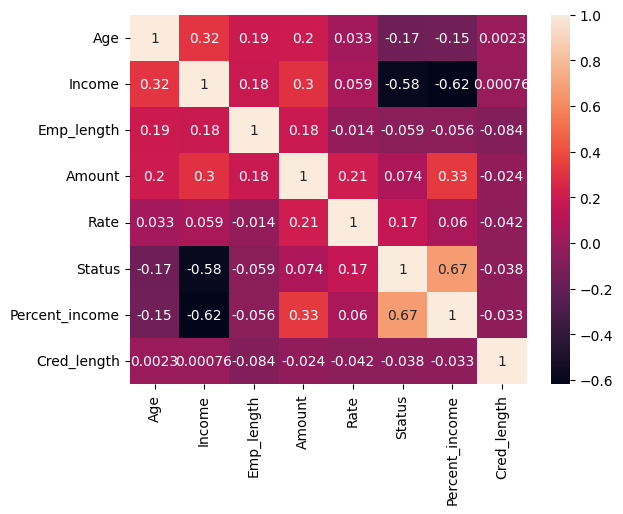

In [ ]:
sns.heatmap(df[['Age','Income','Emp_length','Amount','Rate','Status','Percent_income','Cred_length']].corr()
, annot=True)

По данной тепловой карте можно сделать вывод, что линейная взаимосвязь между переменными отсутствует. Нулевой корреляции так же нет. Между возрастом и суммой кредита в процентах от дохода отрицательная корреляция, что означает то, что при увеличении одного показателя, другой уменьшается. Между доходом и возрастом положительная корреляция, что означает то, что при увеличении одного показателя, увеличивается и другой. Можно сказать, что чем выше доход, тем ниже сумма кредита в процентах от дохода, также есть взаимосвязь между возрастом и доходом.

**График 1**

Использовать seaborn. По группировке - статус домовладения (home) по количеству дефолтов (default) построить диаграмму следующего вида:

Была построена столбчатая диаграмма для отображения количества заявителей по статусу дефолтов и статусу домовладения.

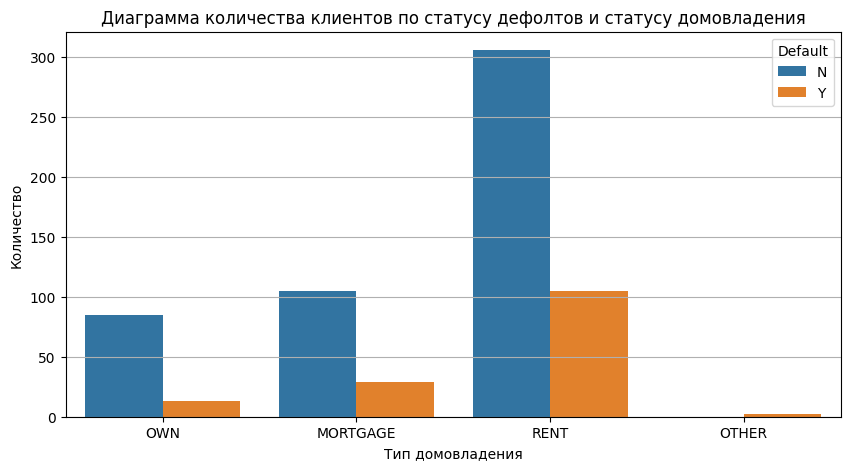

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'Home', hue = 'Default')
plt.xlabel('Тип домовладения')
plt.ylabel('Количество')
plt.title('Диаграмма количества клиентов по статусу дефолтов и статусу домовладения')
plt.grid(axis='y')
plt.legend(title='Default')

По данному графику можно сделать вывод, что количество заявителей с типом домовладения "Аренда", допустивших дефолт, составляет четверть от всего количества заявителей с типом домовладения "Аренда", также можно сказать, что количество заявителей с типом домовладения "Аренда", не допустивших дефолт в разы выше, чем у заявителей с другими типа домовладения, однако это можно связать с тем, что таких заявителей в разы больше.

**График 2**

Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднюю сумму кредита (amount) по цели кредита. Оставить только маркеры в виде ⬤ синего цвета размером 14.

Был постороен график средней суммы кредита по цели кредита.

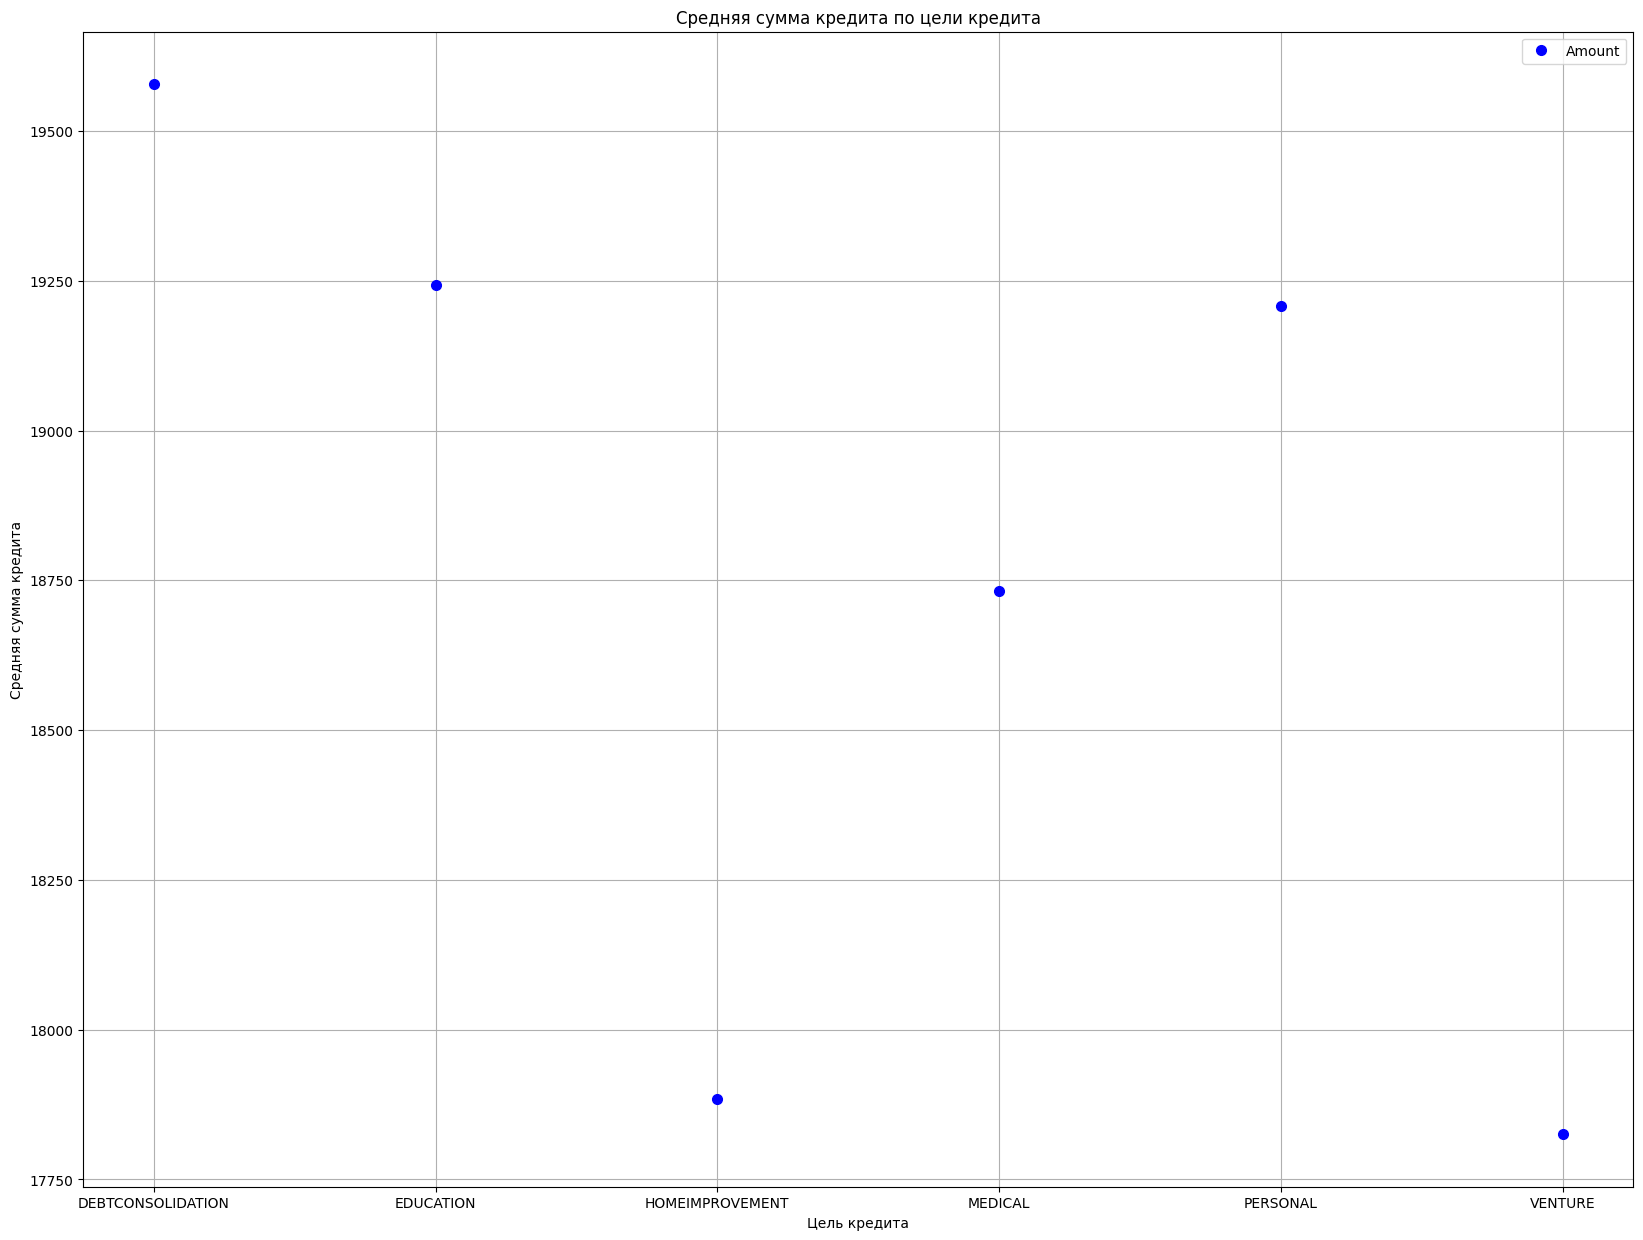

In [ ]:
pivot_table_2 = df.pivot_table(values = 'Amount',index = 'Intent', aggfunc = 'mean' )

ax = pivot_table_2.plot(kind='line', color = 'blue', linewidth = 0, marker = '.', markersize = 14, figsize = (20,15))
plt.xlabel('Цель кредита')
plt.ylabel('Средняя сумма кредита')
plt.title('Средняя сумма кредита по цели кредита')
plt.grid()
plt.show()


По данному графику можно сделать вывод, что средняя сумма кредита по цели кредита "консолидация задолжностей" самая высокая, в то время, как по цели кредита "Венчурный" самая низкая.

**График 3**

Отфильтровать данные и выбрать  default='N' Построить круговую диаграмму, которая отображает процент по типу домовладения (home).

Была построена круговая диаграмма, которая отображает распределение по типу домовладения.

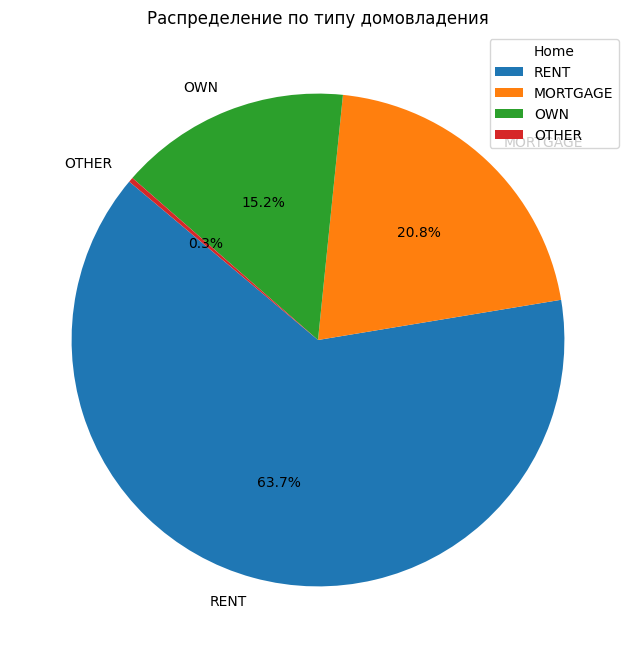

In [ ]:
homes = df['Home'].value_counts()

home_indexes = homes.index
home_summ = homes.values

plt.figure(figsize = (8,8))
plt.pie(home_summ, labels = home_indexes, autopct = '%1.1f%%', startangle = 140)
plt.title("Распределение по типу домовладения")
plt.legend(title = 'Home')

По данной диаграмме можно сделать вывод, что большинство заявителей арендует жилье, меньшее количество платит ипотеку за жилье, всего у 15 процентов собственное жилье.

# **Вывод**
Были проанализированы данные банка по заявкам на кредит, которые содержат в себе информацию о типе домовладения заявителя, проценте кредита от зарплаты, стаже работы, и другие, построены графики по определенным наборам данных (зависимость суммы кредита от типа домовладения, проценту по кредиту от суммы кредита и т.д.), из которых можно сделать следующие выводы:
1.	Большинство заявителей арендует жилье.
2.	В среднем, чем выше заработок, тем меньше процент суммы кредита от заработка.
3.	В среднем, чем выше возраст, тем выше заработок.


Необходимо было построить график в формате Hexagonal binning plot по столбцам Percent_income и Amount


<Axes: xlabel='Amount', ylabel='Percent_income'>

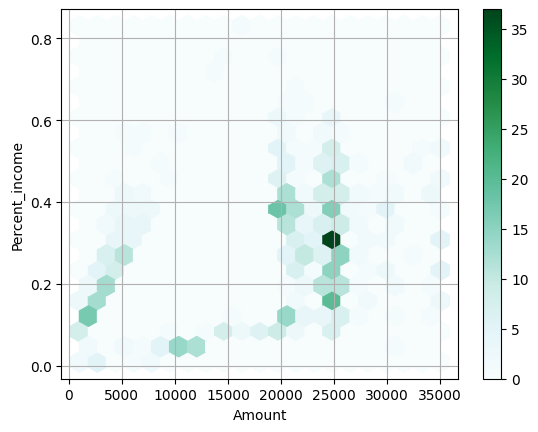

In [ ]:
df.plot(x = 'Amount', y = 'Percent_income', kind = 'hexbin', gridsize = 20, grid =True)

По данному графику можно сделать вывод, что существует достаточно много кредитов с суммой в 25 000, низкое количество кредитов с малой суммой и с малым процентом суммы кредита от заработка. В среднем, люди берут кредиты на 20 000 - 25 000, с процентной ставкой от 0.1 до 0.6.

Необходимо было построить график в формате Боксплот по столбцам Home и Amount.

<Axes: xlabel='Amount', ylabel='Home'>

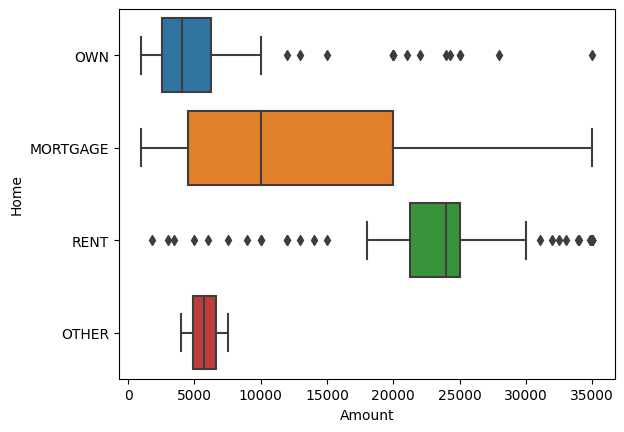

In [ ]:
sns.boxplot(data = df,x = 'Amount', y = 'Home')

По данному графику можно сделать вывод, что среди заявителей с суммой кредита от 2 000 до 35 000 имеются те, кто арендует жилье, также достаточно много заявителей, которые живут в квартирах, купленных в ипотеку, имеющих сумму кредита от 5 000 до 20 000. Также можно сказать, что большинство заявителей имеющих собственное жилье берут кредиты на суммы от 2 000 до 5 000.

Выполнить категоризацию для дохода, построить гистограмму с количеством клиентов каждой категории.

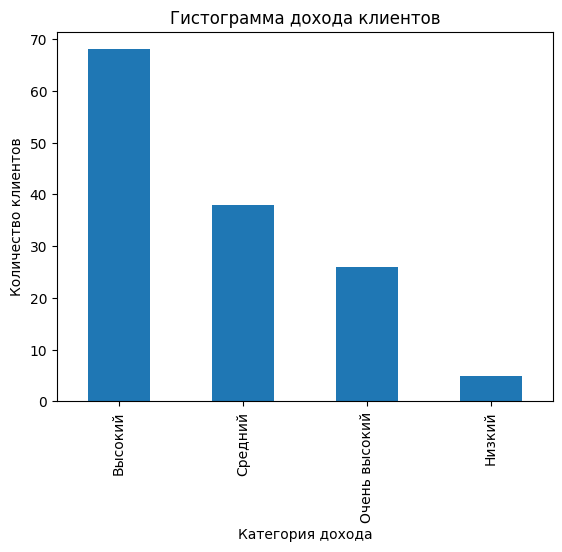

In [ ]:
bins = [0, 1000, 2500, 5000, 7500]
labels = ['Низкий', 'Средний', 'Высокий', 'Очень высокий']

df.head()
df['Доход категор'] = pd.cut(df['Amount'], labels=labels, bins=bins)

# Построение гистограммы
df['Доход категор'].value_counts().plot(kind='bar')
plt.xlabel('Категория дохода')
plt.ylabel('Количество клиентов')
plt.title('Гистограмма дохода клиентов')
plt.show()
